In [12]:
import numpy as np
import pandas as pd
cah = pd.read_csv("/Users/marvinlee/Documents/vs_code/gsb_544/lab/final2/CAH-201803-train.csv")

# 1. Cleaning

In [13]:
cah

,id_num,Q1,Q2,political_affiliation,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18
0,1,Male,53,Independent,Liberal,College degree,Black,No,No,No,"Yes, somewhat religious",Pro-Choice,No,No,Behave no differently,5,2,5,No
1,5,Female,66,Independent,Conservative,Some college,White,Yes,No,Yes,"Yes, very religious",Pro-life,Yes,Yes,Less Willing,4,5,4,No
2,7,Female,58,Democrat,Liberal,College degree,White,No,No,No,"Yes, very religious",Pro-Choice,No,No,Behave no differently,5,1,4,Yes
3,8,Male,55,Independent,Moderate,High school or less,White,Yes,Yes,Yes,"Yes, somewhat religious",Pro-life,Yes,Yes,Less Willing,4,5,4,Yes
4,9,Male,64,Republican,Conservative,High school or less,White,Yes,Yes,Yes,No,Pro-life,No,No,Behave no differently,5,1,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,325,Male,21,Republican,Conservative,Some college,White,Yes,No,Yes,No,Pro-Choice,Yes,No,Less Willing,5,2,5,No
165,328,Female,41,Republican,Liberal,Graduate degree,White,Yes,Yes,Yes,"Yes, somewhat religious",Pro-Choice,Yes,No,Less Willing,5,2,2,No
166,329,Male,60,Republican,Conservative,Some college,White,Yes,Yes,Yes,"Yes, somewhat religious",Pro-life,No,Yes,Behave no differently,5,5,4,Yes
167,332,Female,51,Republican,Conservative,Graduate degree,White,Yes,Yes,Yes,"Yes, very religious",Pro-life,Yes,No,Less Willing,2,5,1,No


In [14]:
cah.isna().sum().sum()

0

In [15]:
columns_to_dummy = ['Q1','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q18']
cah_dummies = pd.get_dummies(cah[columns_to_dummy], drop_first=True)  *1
cah_dummies

,Q1_Male,Q4_Liberal,Q4_Moderate,Q5_Graduate degree,Q5_High school or less,Q5_Some college,Q6_Black,Q6_Latino,Q6_White,Q7_Yes,Q8_Yes,Q9_Yes,"Q10_Yes, somewhat religious","Q10_Yes, very religious",Q11_Pro-life,Q12_Yes,Q13_Yes,Q14_Less Willing,Q14_More Willing,Q18_Yes
0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,1,1,1,1,0,0
2,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
3,1,0,1,0,1,0,0,0,1,1,1,1,1,0,1,1,1,1,0,1
4,1,0,0,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,0
165,0,1,0,1,0,0,0,0,1,1,1,1,1,0,0,1,0,1,0,0
166,1,0,0,0,0,1,0,0,1,1,1,1,1,0,1,0,1,0,0,1
167,0,0,0,1,0,0,0,0,1,1,1,1,0,1,1,1,0,1,0,0


In [16]:
cah_wip = cah.drop(columns = columns_to_dummy)
cah_clean = pd.concat([cah_wip, cah_dummies], axis =1 )
cah_clean

,id_num,Q2,political_affiliation,Q15,Q16,Q17,Q1_Male,Q4_Liberal,Q4_Moderate,Q5_Graduate degree,...,Q8_Yes,Q9_Yes,"Q10_Yes, somewhat religious","Q10_Yes, very religious",Q11_Pro-life,Q12_Yes,Q13_Yes,Q14_Less Willing,Q14_More Willing,Q18_Yes
0,1,53,Independent,5,2,5,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5,66,Independent,4,5,4,0,0,0,0,...,0,1,0,1,1,1,1,1,0,0
2,7,58,Democrat,5,1,4,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,8,55,Independent,4,5,4,1,0,1,0,...,1,1,1,0,1,1,1,1,0,1
4,9,64,Republican,5,1,1,1,0,0,0,...,1,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,325,21,Republican,5,2,5,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
165,328,41,Republican,5,2,2,0,1,0,1,...,1,1,1,0,0,1,0,1,0,0
166,329,60,Republican,5,5,4,1,0,0,0,...,1,1,1,0,1,0,1,0,0,1
167,332,51,Republican,2,5,1,0,0,0,1,...,1,1,0,1,1,1,0,1,0,0


In [66]:
X = cah_clean.drop(['id_num','political_affiliation'], axis = 1)
y = cah_clean['political_affiliation']

# 2. Modeling

In [25]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

## a. Tree

In [200]:
tree = DecisionTreeClassifier(random_state= 42)
param_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 30],
    'class_weight': [None, 'balanced']
}
grid_search_tree = GridSearchCV(tree, param_tree, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_tree.fit(X, y)

print("Best parameters:", grid_search_tree.best_params_)
print("Accuracy:", grid_search_tree.cv_results_['mean_test_score'][grid_search_tree.best_index_])

Best parameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Accuracy: 0.5511586452762923


In [201]:
best_tree = grid_search_tree.best_estimator_
y_pred_tree = cross_val_predict(best_tree, X, y, cv=5)
print("\nClassification Report:\n", classification_report(y, y_pred_tree))


Classification Report:
               precision    recall  f1-score   support

    Democrat       0.53      0.64      0.58        59
 Independent       0.52      0.48      0.50        56
  Republican       0.62      0.52      0.57        54

    accuracy                           0.55       169
   macro avg       0.56      0.55      0.55       169
weighted avg       0.56      0.55      0.55       169



In [ ]:
#numeric_features = ["Q2", "Q15", "Q16", "Q17"]
#categorical_features = ["Bldg Type"]

## b. LDA

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis()
param_lda = [
    {'solver': ['lsqr'], 'shrinkage': [None, 'auto', 0.1, 0.5, 1.0]},
    {'solver': ['eigen'], 'shrinkage': [None, 'auto', 0.1, 0.5, 1.0]},
    {'solver': ['svd'], 'shrinkage': [None]}
]
grid_search_lda = GridSearchCV(lda, param_lda, cv=5, scoring='accuracy')
grid_search_lda.fit(X, y)

# Print the best parameters
print("Best parameters:", grid_search_lda.best_params_)

# Print the best score for each metric
print("Best cross-validation scores:")
print("Accuracy:", grid_search_lda.cv_results_['mean_test_score'][grid_search_lda.best_index_])

Best parameters: {'shrinkage': 'auto', 'solver': 'lsqr'}
Best cross-validation scores:
Accuracy: 0.6098039215686274


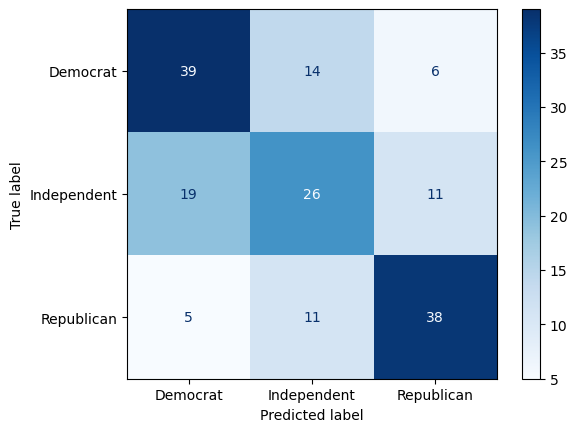

In [55]:
best_lda2 = grid_search_lda.best_estimator_
y_pred_lda2 = cross_val_predict(best_lda2, X, y, cv=5)
cm_lda2 = confusion_matrix(y, y_pred_lda2)
disp_lda2 = ConfusionMatrixDisplay(confusion_matrix=cm_lda2, display_labels=best_lda2.classes_)
disp_lda2.plot(cmap='Blues', values_format='d')

## c.QDA

In [42]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [43]:
import warnings

# Suppress the specific warning for collinearity
warnings.filterwarnings('ignore', category=UserWarning, message="Variables are collinear")

In [44]:
qda = QuadraticDiscriminantAnalysis()
param_qda = [
    {
     'reg_param': [0.1, 0.5, 1.0]}
]
grid_search_qda = GridSearchCV(qda, param_qda, cv=5, scoring='accuracy')
grid_search_qda.fit(X, y)

# Print the best parameters
print("Best parameters:", grid_search_qda.best_params_)

# Print the best score for each metric
print("Best cross-validation scores:")
print("Accuracy:", grid_search_qda.cv_results_['mean_test_score'][grid_search_qda.best_index_])

Best parameters: {'reg_param': 0.1}
Best cross-validation scores:
Accuracy: 0.5918003565062389


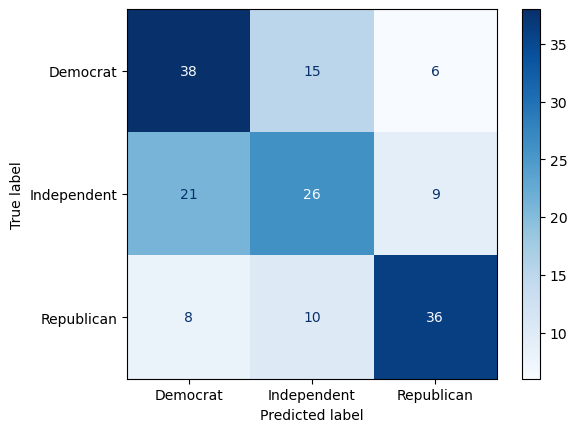

In [54]:
best_qda2 = grid_search_qda.best_estimator_
y_pred_qda2 = cross_val_predict(best_qda2, X, y, cv=5)
cm_qda2 = confusion_matrix(y, y_pred_qda2)
disp_qda2 = ConfusionMatrixDisplay(confusion_matrix=cm_qda2, display_labels=best_qda2.classes_)
disp_qda2.plot(cmap='Blues', values_format='d')

## d. KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn1 = KNeighborsClassifier()

In [51]:
np.sqrt(168)

12.96148139681572

In [52]:
param_knn1 = {
    'n_neighbors': range(10, 25),
    'weights': ['uniform', 'distance'],
    'metric': ['manhattan', 'euclidean']
}
grid_search_knn1 = GridSearchCV(knn1, param_knn1, cv=5, scoring='accuracy')
grid_search_knn1.fit(X, y)

# Print the best parameters
print("Best parameters:", grid_search_knn1.best_params_)

# Print the best score for each metric
print("Best cross-validation scores:")
print("Accuracy:", grid_search_knn1.cv_results_['mean_test_score'][grid_search_knn1.best_index_])

Best parameters: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}
Best cross-validation scores:
Accuracy: 0.544741532976827


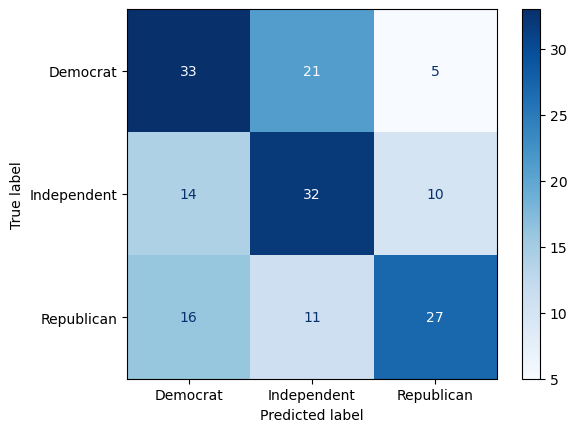

In [53]:
best_knn1 = grid_search_knn1.best_estimator_
y_pred_knn1 = cross_val_predict(best_knn1, X, y, cv=5)
cm_knn1 = confusion_matrix(y, y_pred_knn1)
disp_knn1 = ConfusionMatrixDisplay(confusion_matrix=cm_knn1, display_labels=best_knn1.classes_)
disp_knn1.plot(cmap='Blues', values_format='d')

## e.log reg

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [163]:
print("Columns in X:", X.columns.tolist())

Columns in X: ['Q2', 'Q15', 'Q16', 'Q17', 'Q1_Male', 'Q4_Liberal', 'Q4_Moderate', 'Q5_Graduate degree', 'Q5_High school or less', 'Q5_Some college', 'Q6_Black', 'Q6_Latino', 'Q6_White', 'Q7_Yes', 'Q8_Yes', 'Q9_Yes', 'Q10_Yes, somewhat religious', 'Q10_Yes, very religious', 'Q11_Pro-life', 'Q12_Yes', 'Q13_Yes', 'Q14_Less Willing', 'Q14_More Willing', 'Q18_Yes']


In [174]:
logreg = LogisticRegression()

In [198]:
param_logreg = {
    'C': [0.01, 0.1, 1, 10, 15],
    'solver': ['lbfgs', 'saga'],  # Supports different penalties
    'penalty': ['l2'] if 'lbfgs' else ['l1', 'l2', 'elasticnet'],
    'multi_class': ['ovr', 'multinomial'],
    'max_iter': [10000]
}

In [199]:
grid_logreg = GridSearchCV(logreg, param_logreg, cv=5, scoring='accuracy', n_jobs=-1)
grid_logreg.fit(X, y)
print("Best parameters found: ", grid_logreg.best_params_)


# Print the best score for each metric
print("Best cross-validation scores:")
print("Accuracy:", grid_logreg.cv_results_['mean_test_score'][grid_logreg.best_index_])

Best parameters found:  {'C': 1, 'max_iter': 10000, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validation scores:
Accuracy: 0.6450980392156863


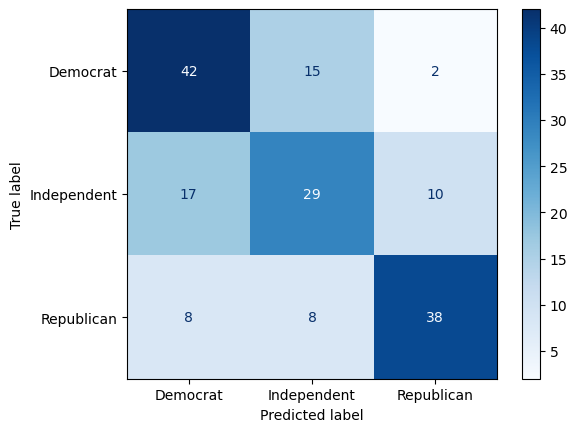

In [197]:
best_logreg = grid_logreg.best_estimator_
y_pred_logreg = cross_val_predict(best_logreg, X, y, cv=5)
cm_logreg = confusion_matrix(y, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=best_logreg.classes_)
disp_logreg.plot(cmap='Blues', values_format='d')

## Predict

In [125]:
test = pd.read_csv("/Users/marvinlee/Documents/vs_code/gsb_544/lab/final2/CAH-201803-test.csv")

In [126]:
test_dummies = pd.get_dummies(test[columns_to_dummy], drop_first=True)  *1
test_dummies

,Q1_Male,Q4_Liberal,Q4_Moderate,Q5_Graduate degree,Q5_High school or less,Q5_Some college,Q6_Black,Q6_Latino,Q6_White,Q7_Yes,Q8_Yes,Q9_Yes,"Q10_Yes, somewhat religious","Q10_Yes, very religious",Q11_Pro-life,Q12_Yes,Q13_Yes,Q14_Less Willing,Q14_More Willing,Q18_Yes
0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,1,1,0,0,1
1,1,0,1,0,1,0,1,0,0,1,1,1,0,1,0,0,0,0,1,0
2,1,0,1,0,1,0,0,0,1,1,0,1,0,1,1,1,0,0,0,1
3,1,0,1,1,0,0,0,0,1,1,1,1,1,0,0,0,1,1,0,0
4,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0
162,1,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0
163,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
164,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1


In [127]:
test_wip = test.drop(columns = columns_to_dummy)
test_clean = pd.concat([test_wip, test_dummies], axis =1 )
test_clean

,id_num,Q2,Q15,Q16,Q17,Q1_Male,Q4_Liberal,Q4_Moderate,Q5_Graduate degree,Q5_High school or less,...,Q8_Yes,Q9_Yes,"Q10_Yes, somewhat religious","Q10_Yes, very religious",Q11_Pro-life,Q12_Yes,Q13_Yes,Q14_Less Willing,Q14_More Willing,Q18_Yes
0,2,78,4,5,1,0,0,0,0,0,...,1,0,0,1,0,1,1,0,0,1
1,3,59,5,4,5,1,0,1,0,1,...,1,1,0,1,0,0,0,0,1,0
2,4,59,4,5,1,1,0,1,0,1,...,0,1,0,1,1,1,0,0,0,1
3,6,52,5,4,4,1,0,1,1,0,...,1,1,1,0,0,0,1,1,0,0
4,11,33,5,5,4,0,0,1,0,1,...,0,1,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,327,68,5,5,2,0,0,1,1,0,...,0,0,0,1,1,1,0,0,0,0
162,330,20,5,2,5,1,0,1,0,1,...,1,1,0,0,0,0,0,1,0,0
163,331,65,5,2,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
164,333,54,5,1,5,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [128]:
test_clean.isna().sum().sum()

0

In [129]:
X_test = test_clean.drop(['id_num'], axis = 1)

In [202]:
final_prediction2 = pd.DataFrame(
    {"id_num": test_clean['id_num'],
    "political_affiliation_predicted": best_logreg.predict(X_test)}
)

In [204]:
final_prediction2

,id_num,political_affiliation_predicted
0,2,Republican
1,3,Democrat
2,4,Democrat
3,6,Republican
4,11,Independent
...,...,...
161,327,Democrat
162,330,Independent
163,331,Democrat
164,333,Democrat


In [116]:
final_prediction2.to_csv('/Users/marvinlee/Documents/vs_code/gsb_544/lab/final2/final_predictions2.csv', index=False)